<a href="https://colab.research.google.com/github/lbusatto/Examen-final/blob/main/Examen%20Final%20Diplo%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://uade.edu.ar/media/z3sesiag/uade_una_gran_universidad.png" alt="drawing" style="width:200px;"/>

# Examen Final Diplomatura en Ciencia de Datos 2023

A continuación, se detallan las indicaciones generales para la resolución del examen. Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El examen se realiza de forma grupal de acuerdo a la asignación previamente realizada (Grupo 1, Grupo 2, Grupo 3)

2. La fecha de entrega de trabajo es el viernes 1 de Diciembre a las **19:00 hs** (Argentina)

3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato `.ipynb.` Los datasets generados se deben entregar en formato comprimido o disponibilizarlos en un repositorio online (ej. Google Drive) y compartir el link. El nombre el notebook debe seguir la nomenclatura siguiente: \"Grupo#_Examen_Final_DiploDS.ipynb\"

4. Puede utilizar diferentes herramientas para el desarrollo como `Jupyter`, `Colab`, `Spypder` o `VSCodium`, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3. Este Notebook presenta un modelo de los puntos a utilizar. Puede usarse como template o elegir otro formato, pero se debe contar con los puntos indicados: carga de datos, EDA, división de los sets de datos, cross-validation, entrenamiento, evaluación y conclusiones

5. Para visualizaciones durante el desarrollo del EDA se deben usar librerías matplotlib y seaborn, siendo las visualizaciones finales a exponer desarrolladas en Tableau, PowerBI u otra herramienta de BI

6. La defensa del trabajo se realizará el **Lunes 4 de Diciembre de forma grupal y presencial**. Se les brindará un espacio de 25 a 30 minutos para la exposición y luego un espacio a preguntas. Se evaluará la claridad en la exposición, cohesión de la misma y la estructura completa. Deberán estar disponibles para responder preguntas sobre el código y el desarrollo del notebook además de la exposición.

7. La nota se obtendrá en base a un promedio entre el desarrollo del trabajo, defensa del mismo en forma grupal y exposición individual

Como parte del examen se evaluarán los siguientes conceptos:
* Importar datos desde fuentes externas
* Limpieza de datos
* Gestión de datos y transformaciones
* Modelado de datos
* Visualizaciones
* Selección de variables
* Feature engineering
* Manejo de sets de entranamiento y validación
* Cross validation
* Entrenamiento del modelo
* Interpretación de resultados e indicadores
* Almacenamiento de resultados

## Consigna del Examen

Como parte del equipo de datos de una EdTech se les requiere dar soporte a una conocida Universidad para entender por qué los alumnos tienen éxito o fracasan en su plan de carrera. Esta es una gran oportunidad para generar lazos con entidades y organizaciones de mayor importancia y despegar como startup. No está confirmado, pero hay un rumor de qué otras empresas estarán participando en busca de los mismos resultados.

El objetivo presentado por la Universidad es poder predecir si un alumno/a se graduará, se mantendrá o abandonará la cursada. En palabras del CDAO

*"Hoy el mercado universitario es muy competitivo, incluso tenemos amenazas de otros sectores que nos 'canibalizan' parte del alumnado. Necesitamos actuar pronto para comprender los motivos y los perfiles que llevan a un/a alumno/a a continuar o abandonar para poder gestionar mejor las campañas y las acciones. Especialmente queremos enfocar en la retención, porque nos cuesta mucho dinero perder un/a alumno/a"*

Se solicita presentar en una sesión de 30 minutos el entendimiento del problema y los resultados obtenidos, así como recomendaciones de acción para la Universidad. La presentación debe estar orientada a un nivel de Director (conocimiento técnico pero interés comercial). La presentación debe contener soporte gráfico (visualizaciones o Dashboards de BI) que refuercen el mensaje.
El equipo que estará presente en la exposición está compuesto por
* Director de Arquitectura de Datos
* Director de Analítica y Ciencia de Datos
* Director de Marketing y Relaciones con Alumnos
(es posible que el CDAO se sume en la sesión)

El Director de Arquitectura de Datos requiere que se le presente un modelo de datos que pueda ser consumible luego desde su arquitectura analítica (la Universidad está construyendo un Datawarehouse) por lo cual requiere que al dataset principal se le sumen entidades de consulta (lookups) y que esto pueda ser consumible desde una herramienta de BI.
* Hint: poder presentar un esquema de modelo relacional/estrella que permita comprender la relación entre, por ejemplo, el código 1 en la columna "attendance" se pueda visualizar como "Daytime"

Los archivos a utilizar se encuentran almacenados en la siguiente URL:

**Datasets**: `Academic Success and dropout.zip`

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre y Apellido | LU
------------------|---
 |
 |
 |
 |
 |
 |
 |



## Importar Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

## Carga de datos

In [ ]:
# Define el archivo CSV
file_path = '/content/Examen/Academic Success and dropout.csv'

# Lee el archivo CSV y usa la primera fila como encabezados
df = pd.read_csv(file_path, sep=';', header=0, encoding='utf-8')

# Ahora puedes imprimir el DataFrame
df.head(10)

In [93]:
df2 = df.copy()
#Borra nulos habiendo corroborado que sólo generaban ruido
df2_encoded = df2.dropna()

# Eliminar las comillas de los nombres de las columnas
#df.columns = df.columns.str.replace("'", "")
#Convierte columnas categoricas a columnas binarias para facilitar el entrenamiento del modelo (No mejoro)
#encoded_col = ['Marital status', 'Application order', 'Nacionality']
#df2_encoded = pd.get_dummies(df2, columns=encoded_col)
#df2_encoded = df2_encoded.drop(columns=encoded_col)

# Convertir todos los valores de 'Target' a cadenas (strings)
df2_encoded['Target'] = df2_encoded['Target'].astype(str)
# Deja solo las filas que no contienen 'Enrolled' en la columna 'Target'
df2_train = df2_encoded[~df2_encoded['Target'].str.contains('Enrolled')]

# Almacenar features en X y Target en y
y = df2_train['Target']
X = df2_train.drop(columns=['Target'])
# Deja solo las filas que no contienen 'Enrolled' para su posterior prediccion
df2_predict = df2_encoded[df2_encoded['Target'].str.contains('Enrolled')]
y_enrolled = df2_predict['Target']
X_enrolled = df2_predict.drop(columns=['Target'])


<ipython-input-93-ebe84f33a8f3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_encoded['Target'] = df2_encoded['Target'].astype(str)


In [96]:
### Normalizar features para facilitar entrenamiento (No mejora resultados)
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [104]:
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Inicializa y entrena modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=2),
    'Logistic Regression': LogisticRegression(random_state=2, max_iter=1500),
    'Decision Tree': DecisionTreeClassifier(random_state=2)
}

results = {}

# Evalúa cada modelo
for model_name, model in models.items():
    # Entrena el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evalúa el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Guarda los resultados en un diccionario
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Imprime los resultados para cada modelo
for model_name, metrics in results.items():
    print(f"\nResultados para {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1-score: {metrics['F1-score']}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Resultados para Random Forest:
Accuracy: 0.9270
Precision: 0.9338549312691846
Recall: 0.913844134144886
F1-score: 0.9218096877305139

Resultados para Logistic Regression:
Accuracy: 0.9174
Precision: 0.922817534657175
Recall: 0.9040458288578589
F1-score: 0.9115497076023391

Resultados para Decision Tree:
Accuracy: 0.8678
Precision: 0.860863230741213
Recall: 0.862608903210407
F1-score: 0.8617066027477718


In [115]:
#Prueba de hiperparametros con mejores resultados
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# Crea un modelo de Bosque Aleatorio multilabel
random_forest = RandomForestClassifier(max_depth=10, n_estimators=80) #Mejora accu con 8 y 130
# Entrena el modelo en el conjunto de entrenamiento
random_forest.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred_forest = random_forest.predict(X_test)

# Evalúa el rendimiento del Bosque Aleatorio sin especificar el modo
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

# Imprime los resultados del Bosque Aleatorio
print("\nResultados del Bosque Aleatorio:")
print(f"Exactitud (Accuracy): {accuracy_forest}")
print(f"Precision: {precision_forest}")
print(f"Recall: {recall_forest}")
print(f"F1-score: {f1_forest}")



Resultados del Bosque Aleatorio:
Exactitud (Accuracy): 0.9201101928374655
Precision: 0.8997912317327766
Recall: 0.9773242630385488
F1-score: 0.9369565217391305


In [ ]:
### VER CUALES HOT ENCODEAR
print(df2.nunique().sort_values(ascending=True))
encoded_col = ['Marital status', 'Application order', 'Nationality']


In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define el modelo
rf_model = RandomForestClassifier()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': np.arange(80, 150, 10),  # Rango de valores para n_estimators
    'max_depth': np.arange(7, 14, 1)  # Rango de valores para max_depth, incluyendo None
}

# Realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=2
)

# Ajusta el modelo a los datos
random_search.fit(X, y)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Muestra la mejor puntuación de precisión
print("Mejor puntuación de precisión:", random_search.best_score_)


Mejores hiperparámetros encontrados:
{'n_estimators': 80, 'max_depth': 9}
Mejor puntuación de precisión: 0.9082644628099175


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define una cuadricula de hiperparametros que deseas ajustar
param_grid = {
    'n_estimators': np.arange(80, 150, 10),  # Rango de valores para n_estimators
    'max_depth': np.arange(7, 14, 1)  # Rango de valores para max_depth, incluyendo None
}

# Crea una instancia del Random Forest Classifier ponderado
rf_model = RandomForestClassifier()

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=6, scoring='accuracy')

# Realiza el grid search en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparametros encontrados
mejores_hiperparametros = grid_search.best_params_

# Evalúa el modelo con los mejores hiperparametros en los datos de prueba
modelo_optimizado = grid_search.best_estimator_
precision = modelo_optimizado.score(X_test, y_test)

print("Mejores hiperparametros:", mejores_hiperparametros)
print("Precisión en datos de prueba:", precision)


Mejores hiperparametros: {'max_depth': 10, 'n_estimators': 80}
Precisión en datos de prueba: 0.9173553719008265


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Crear un modelo de regresion logística
model_logreg = LogisticRegression(max_iter=3000)
# Entrenar el modelo con los datos de entrenamiento
model_logreg.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_logreg = model_logreg.predict(X_test)

# Calcular la precision del modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Precision del modelo Regresion Logistica:", accuracy_logreg)


Precision del modelo Regresion Logistica: 0.921028466483012


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<ipython-input-90-fe22d65a2bbe>:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dfx.corrwith(dfy)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


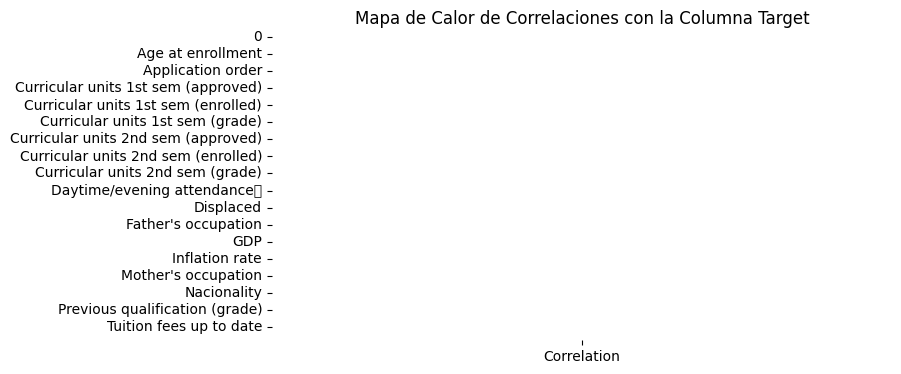

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dfx = pd.DataFrame(X)
dfy = pd.DataFrame(y)
correlations = dfx.corrwith(dfy)

# Crea un mapa de calor
plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(correlations, columns=['Correlation']), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Mapa de Calor de Correlaciones con la Columna Target')
plt.show()



In [ ]:
param_archivos = [
    {'archivos': ['/content/Examen/nation.csv'], 'sep': '-'},
    {'archivos': ['/content/Examen/education.csv', '/content/Examen/father educ.csv'], 'sep': '\t'},
    {'archivos': ['/content/Examen/course.csv',
                  '/content/Examen/mother educ.csv',
                  '/content/Examen/father educ.csv',
                  '/content/Examen/marital.csv',
                  '/content/Examen/marital.csv'], 'sep': ';'},
    {'archivos': ['/content/Examen/application.csv'], 'sep': ','}
]


## Preparación y análisis de datos (EDA)

In [87]:
dfx

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,2,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,1,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4556,1,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4557,1,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4558,1,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


## Data split

## Selección de atributos

## Estandarización

## Cross-Validation

## Entrenamiento modelo definitivo

## Evaluación modelo

## Conclusiones